<a href="https://colab.research.google.com/github/AntoniaAcevedo/ADA-Informe/blob/main/Informe5_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.
 
![image](https://i.imgur.com/WrKPuDz.jpg)

#2. RadixSort

---
En los siguientes códigos se mostraran tres casos del algoritmo **RadixSort**.

##2.1 Codigo

---

In [1]:
def countingSort(A, pos, t, verbose = False):
    l = len(A)
    salida = [0] * l
    cont = [0] * 10
    #se calcula el cont de elementos (conteo de elementos)
    for i in range(0, l):
        ind = A[i] // pos
        cont[ind % 10] += 1
    #se calcula el recuento acumulativo 
    for i in range(1, 10):
        cont[i] += cont[i - 1]
    #se ordenan los elementos
    i = l - 1
    while i >= 0:
        t+=1
        if verbose:
          print("\n Iteracion",t)
          print(str(A)[1:-1])
        ind = A[i] // pos
        salida[cont[ind % 10] - 1] = A[i]
        cont[ind % 10] -= 1
        i -= 1
    for i in range(0, l):
        A[i] = salida[i]
    return t


def radixSort(A,t,verbose = False):
    #saca el maximo elemento del array
    max_element = max(A)
    pos= 1
    #se llama a coutingSort para clasificar elementos segun el valor de su posicion
    while max_element // pos > 0:
        t= countingSort(A, pos, t, verbose)
        pos *= 10
    return t

# Ejemplo
A= [121, 432, 564, 237, 154, 456, 788]
print("Entrada: ",A)
t= radixSort(A,0)
print("Salida: ",A)
print("# comparaciones: ",t)

Entrada:  [121, 432, 564, 237, 154, 456, 788]
Salida:  [121, 154, 237, 432, 456, 564, 788]
# comparaciones:  21


##2.2 Descripcion del algoritmo

---



El algoritmo RadixSort en este caso esta considerada como digitos enteros. Con esto en mente, para ordenar las claves, este lo reubica por cada uno de sus digitos (filas dentro del digito original), de menor a mayor. Donde se encuentra la necesidad de tener una variable con el maximo de elementos a utilizar, mas adelante se hace un llamado a la funcion de CoutingSort el cual se utiliza para ordenar dichos digitos. 

En donde CountingSort necesita pasar por 4 pasos respectivamente comenzando por un "for" donde se calcula el conteo oficial de elementos continuando con otro "for" que se encarga de calcular el recuento acumulativo entre los contadores para luego seguir con un "while" que ordena los digitos ubicados en dicha fila correspondientemente en la cual esta iterando. Para finalizar con un "for" que almacena en el array los valores ya ordenados correctamente. 

Esto se repite sucesivamente hasta poder tener ordenar sucesivamente todas las filas mientras se va recorriendo los numeros del arreglo.

##2.3 Ejemplo 

---

Consideremos, por ejemplo, el arreglo:

$a=[445,132,546,305]$

- En la primera pasada se compara la primera fila desde el lado derecho odenandolos de menor a mayor

$a=[132,305,445,546]$

- Luego, en la segunda pasada se avanza una fila a la izquierda ordenandolos de menor a mayor.

$a=[305,132,445,546]$

- Luego, en la tercera pasada se avanza a la ultima fila en este caso, si hay mas filas se repetiria constantemente hasta completar todas las filas existentes, para asi ordenar de menor a mayor.

$a=[132,305,445,546]$

Y ya tenemos el arreglo ordenado.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

---
Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [2]:
import random

a = random.sample(range(100, 1000), 8)
print("ENTRADA: ",a)
t= radixSort(a, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [389, 541, 951, 452, 157, 263, 848, 741]

 Iteracion 1
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 2
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 3
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 4
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 5
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 6
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 7
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 8
389, 541, 951, 452, 157, 263, 848, 741

 Iteracion 9
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 10
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 11
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 12
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 13
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 14
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 15
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 16
541, 951, 741, 452, 263, 157, 848, 389

 Iteracion 17
541, 741, 848, 951, 452, 157, 263, 389

 Iteracion 18
541, 741, 848, 951, 452, 

#3. Tiempo de ejecucion

---

### **Teorema (Tiempo de ejecución).**

*El algoritmo **RadixSort** tiene un **tiempo de ejecución de** $O(n^2)$ en el peor caso.*

*Aunque  tiene un **tiempo de ejecución de** $O(n)$ en el caso promedio.*
## Prueba del teorema

Observando el código, podemos apreciar que el **peor caso** ocurre cuando un elemento de la lista de tamaño $n$ contiene $n$ digitos.

###Ejemplo

In [68]:
a = [965,159,734,258]
print("ENTRADA: ",a)
t= radixSort(a, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [965, 159, 734, 258]

 Iteracion 1
965, 159, 734, 258

 Iteracion 2
965, 159, 734, 258

 Iteracion 3
965, 159, 734, 258

 Iteracion 4
965, 159, 734, 258

 Iteracion 5
734, 965, 258, 159

 Iteracion 6
734, 965, 258, 159

 Iteracion 7
734, 965, 258, 159

 Iteracion 8
734, 965, 258, 159

 Iteracion 9
734, 258, 159, 965

 Iteracion 10
734, 258, 159, 965

 Iteracion 11
734, 258, 159, 965

 Iteracion 12
734, 258, 159, 965
# comparaciones:  12


In [70]:
#Ejemplo de peor caso (EXTRA)

a = [965,159,734,255686664]
print("ENTRADA: ",a)
t= radixSort(a, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [965, 159, 734, 255686664]

 Iteracion 1
965, 159, 734, 255686664

 Iteracion 2
965, 159, 734, 255686664

 Iteracion 3
965, 159, 734, 255686664

 Iteracion 4
965, 159, 734, 255686664

 Iteracion 5
734, 255686664, 965, 159

 Iteracion 6
734, 255686664, 965, 159

 Iteracion 7
734, 255686664, 965, 159

 Iteracion 8
734, 255686664, 965, 159

 Iteracion 9
734, 159, 255686664, 965

 Iteracion 10
734, 159, 255686664, 965

 Iteracion 11
734, 159, 255686664, 965

 Iteracion 12
734, 159, 255686664, 965

 Iteracion 13
159, 255686664, 734, 965

 Iteracion 14
159, 255686664, 734, 965

 Iteracion 15
159, 255686664, 734, 965

 Iteracion 16
159, 255686664, 734, 965

 Iteracion 17
159, 734, 965, 255686664

 Iteracion 18
159, 734, 965, 255686664

 Iteracion 19
159, 734, 965, 255686664

 Iteracion 20
159, 734, 965, 255686664

 Iteracion 21
159, 734, 965, 255686664

 Iteracion 22
159, 734, 965, 255686664

 Iteracion 23
159, 734, 965, 255686664

 Iteracion 24
159, 734, 965, 255686664

 Iteracion 

#4. Correctitud

---

### **Teorema (Correctitud).**

*El algoritmo **RadixSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

**Inicialización**

#5. Experimentos

---

##5.1 CountingSort y BucketSort

---
En el siguiente gráfico se visualiza la diferencia que existe en el **tiempo de ejecución** entre el algoritmo **CountingSort** y **BucketSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.



In [41]:
#BucketSort
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b     
              
def bucketSort(x):
    for i in range(len(x)):
      x[i]= x[i] / 10000
    arr = []
    slot_num = 10 
    for i in range(slot_num):
        arr.append([])
    for j in x:
        index_b = int(slot_num * j) 
        arr[index_b].append(j)
    for i in range(slot_num):
        arr[i] = insertionSort(arr[i])
    k = 0
    for i in range(slot_num):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            k += 1
    return x


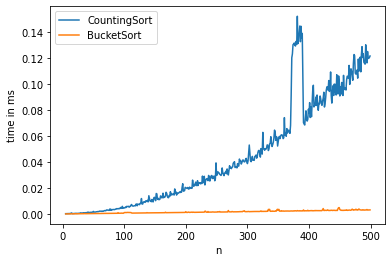

In [64]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  P = repeat(setup="from __main__ import bucketSort , insertionSort", stmt=f"bucketSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(P)

x2=[]; y2=[]

for n2 in range(5,500):

  a2 = random.sample(range(1, 1000), n2)
  pos = 1
  P2 = repeat(setup="from __main__ import countingSort", stmt=f"t= countingSort({a2},{pos}, {0})", repeat=1, number=10)

  x2.append(n2)
  y2.append(P2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["CountingSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Se visualiza que en tiempo de ejecucion del algoritmo **BucketSort** es mas efectivo por diferencia ademas de ser mas constante que el algoritmo de **CountingSort**


## 5.2. RadixSort y BucketSort

---
En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **RadixSort** y **BucketSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

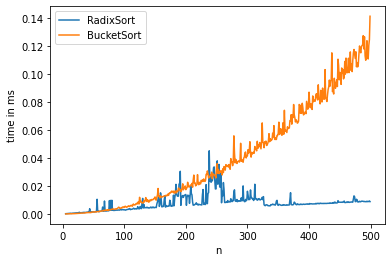

In [65]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort{a, 0}", repeat=1, number=10)

  x.append(n)
  y.append(t)

x2=[]; y2=[]

for n2 in range(5,500):

  a2 = random.sample(range(1, 1000), n2)
  P2 = repeat(setup="from __main__ import bucketSort , insertionSort", stmt=f"bucketSort({a2})", repeat=1, number=10)

  x2.append(n2)
  y2.append(P2)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["RadixSort","BucketSort"])
plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Se visualiza que en tiempo de ejecucion del algoritmo **RadixSort** es mas efectivo por diferencia ademas de ser mas constante que el algoritmo de **BucketSort**, aunque hay situaciones en las cuales el RadixSort logra igualar o superar al BucketSort en el intervalo entre el 0 y el 80 app.

## 5.3. RadixSort y QuickSort

---
En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **RadixSort** y **QuickSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

In [52]:
#QuickSort

def partition(array, low, high):
  pivot = array[high]
  i = low - 1
  for j in range(low, high):
    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1

def quicksort(array, low, high):
  if low < high:
    pi= partition(array, low, high)
    quicksort(array, low, pi - 1)
    quicksort(array, pi + 1, high)

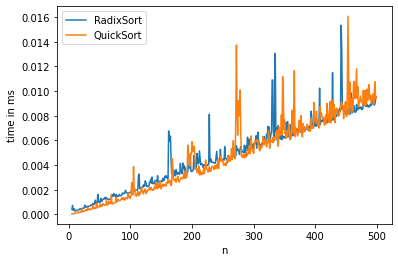

In [66]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort{a, 0}", repeat=1, number=10)

  x.append(n)
  y.append(t)

x2=[]; y2=[]

for n2 in range(5,500):

  a2 = random.sample(range(1, 1000), n2)
  h= len(a2) - 1
  t2 = repeat(setup="from __main__ import quicksort", stmt=f"quicksort{a2, 0, h}", repeat=1, number=10)

  x2.append(n2)
  y2.append(t2)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["RadixSort", "QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Se visualiza que en tiempo de ejecucion del algoritmo **QuickSort** es mas efectivo por una diferencia minima  que el algoritmo de **RadixSort**.